In [ ]:
import tensorflow as tf
import numpy as np
np.set_printoptions(suppress=True)

In [ ]:
def celsius_to_fahrenheit(celsius):
    return (celsius * 1.8) + 32

def generar_temperaturas(num_temperaturas, temperatura_inicial_celsius):
    celsius = np.array([], dtype=float)
    fahrenheit = np.array([], dtype=float)

    for i in range(num_temperaturas):
        celsius_actual = temperatura_inicial_celsius + (0.5 * i)
        fahrenheit_actual = celsius_to_fahrenheit(celsius_actual)

        celsius = np.append(celsius, celsius_actual)
        fahrenheit = np.append(fahrenheit, fahrenheit_actual)

    return celsius, fahrenheit

num_temperaturas = 1000
temperatura_inicial_celsius = -40

celsius_array, fahrenheit_array = generar_temperaturas(num_temperaturas, temperatura_inicial_celsius)

print("Array de Celsius:", celsius_array)
print("Array de Fahrenheit:", fahrenheit_array)

Array de Celsius: [-40.  -39.5 -39.  -38.5 -38.  -37.5 -37.  -36.5 -36.  -35.5 -35.  -34.5
 -34.  -33.5 -33.  -32.5 -32.  -31.5 -31.  -30.5 -30.  -29.5 -29.  -28.5
 -28.  -27.5 -27.  -26.5 -26.  -25.5 -25.  -24.5 -24.  -23.5 -23.  -22.5
 -22.  -21.5 -21.  -20.5 -20.  -19.5 -19.  -18.5 -18.  -17.5 -17.  -16.5
 -16.  -15.5 -15.  -14.5 -14.  -13.5 -13.  -12.5 -12.  -11.5 -11.  -10.5
 -10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5  10.   10.5  11.   11.5  12.   12.5  13.   13.5
  14.   14.5  15.   15.5  16.   16.5  17.   17.5  18.   18.5  19.   19.5
  20.   20.5  21.   21.5  22.   22.5  23.   23.5  24.   24.5  25.   25.5
  26.   26.5  27.   27.5  28.   28.5  29.   29.5  30.   30.5  31.   31.5
  32.   32.5  33.   33.5  34.   34.5  35.   35.5  36.   36.5  37.   37.5
  38.   38.5  39.   39.5  40.   4

In [ ]:
print("Tamaño del array de celsius:", len(celsius_array))
print("Tamaño del array de fahrenheit:", len(fahrenheit_array))

Tamaño del array de celsius: 1000
Tamaño del array de fahrenheit: 1000


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(fahrenheit_array, celsius_array, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de datos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento (Fahrenheit):", x_train.shape[0])
print("Tamaño del conjunto de prueba (Fahrenheit):", x_test.shape[0])
print("Tamaño del conjunto de entrenamiento (Celsius):", y_train.shape[0])
print("Tamaño del conjunto de prueba (Celsius):", y_test.shape[0])

Tamaño del conjunto de entrenamiento (Fahrenheit): 800
Tamaño del conjunto de prueba (Fahrenheit): 200
Tamaño del conjunto de entrenamiento (Celsius): 800
Tamaño del conjunto de prueba (Celsius): 200


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=42)

print("Tamaño del conjunto de validación (Fahrenheit):", x_val.shape[0])
print("Tamaño del conjunto de validación (Celsius):", y_val.shape[0])

Tamaño del conjunto de validación (Fahrenheit): 40
Tamaño del conjunto de validación (Celsius): 40


Entrenamiento del modelo.

In [52]:
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error',
    metrics=['mae']  # Agregar MAE como métrica
)

print("Comenzando entrenamiento...")
historial = modelo.fit(x_train, y_train, epochs=300, verbose=False)
print("Modelo entrenado!")

# Evaluación del modelo con el conjunto de prueba
resultado = modelo.evaluate(x_test, y_test)
print("Pérdida en el conjunto de prueba:", resultado[0])
print("MAE en el conjunto de prueba:", resultado[1])

Comenzando entrenamiento...


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7b1569a1d090>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Modelo entrenado!
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x7b1569a1d090>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 3ms/step - loss: 1.0144e-04 - mae: 0.0095
Pérdida en el conjunto de prueba: 0.00010144342377316207
MAE en el conjunto de prueba: 0.0095268115401268


In [53]:
resultado = modelo.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 1.0144e-04 - mae: 0.0095


In [48]:
resultado = modelo.predict([100.0])
print("Prediccion: 100 grados celsius son " + str(resultado) + " fahrenheit!")

1/1 [==============================] - 0s 84ms/step
Prediccion: 100 grados celsius son [[37.779655]] fahrenheit!


Gráfica de pérdida.

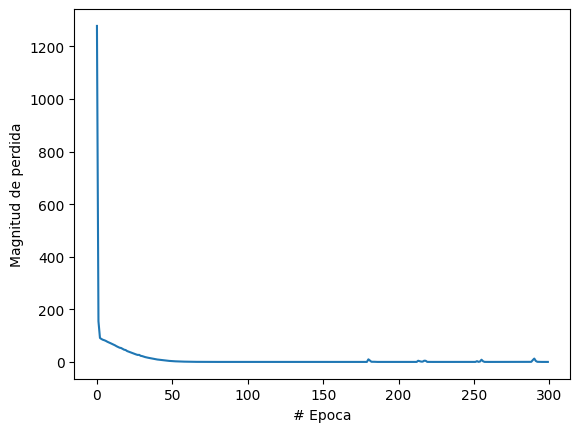

In [54]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

Gráfica de precisión.

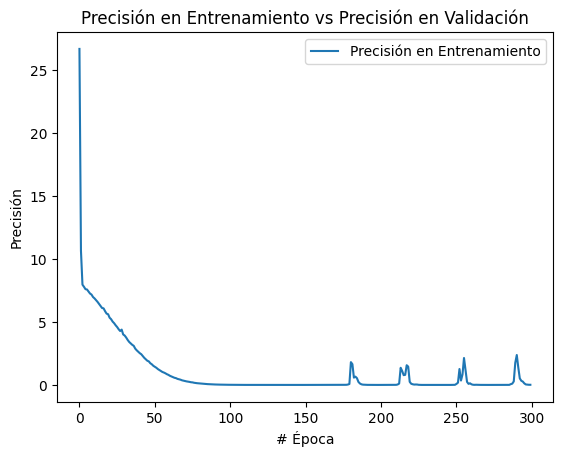

In [57]:
plt.plot(historial.history['mae'], label="Precisión en Entrenamiento")

# Etiquetas de los ejes
plt.xlabel("# Época")
plt.ylabel("Precisión")
plt.legend()  # Mostrar leyenda con los nombres de las líneas

# Título del gráfico
plt.title("Precisión en Entrenamiento vs Precisión en Validación")

# Mostrar la gráfica
plt.show()

In [58]:
modelo.save("fahrenheit_a_celsius.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [ ]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [59]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

mkdir: cannot create directory ‘carpeta_salida’: File exists


In [60]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras fahrenheit_a_celsius.h5 carpeta_salida

2024-04-22 17:01:34.871808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [61]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

group1-shard1of1.bin  model.json
